In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# List available files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load all three datasets
# full_df = pd.read_csv('/kaggle/input/irish-rent-prices-2020-2025-rtb-official-data/irish_rent_full.csv')
specific_df = pd.read_csv('/kaggle/input/irish-rent-prices-2020-2025-rtb-official-data/irish_rent_specific.csv')
county_df = pd.read_csv('/kaggle/input/irish-rent-prices-2020-2025-rtb-official-data/irish_rent_by_county.csv')

print(f"\nDataset Sizes:")
print(f"Full dataset: {full_df.shape}")
print(f"Specific dataset: {specific_df.shape}")
print(f"County dataset: {county_df.shape}")

# Display basic info for each
print("\n--- Full Dataset Info ---")
print(full_df.info())
print("\n--- Specific Dataset Info ---")
print(specific_df.info())

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/irish-rent-prices-2020-2025-rtb-official-data/irish_rent_specific.csv'

In [ ]:
def initial_eda(df, name):
    """Perform initial exploratory data analysis"""
    print(f"\n{'='*60}")
    print(f"EXPLORATORY ANALYSIS: {name}")
    print(f"{'='*60}")
    
    # Basic statistics
    print(f"\n1. Basic Statistics for Rent:")
    print(df['rent_euro'].describe())
    
    print(f"\n2. Missing Values:")
    missing = df.isnull().sum()
    print(missing[missing > 0])
    
    print(f"\n3. Dataset Shape: {df.shape}")
    print(f"   Number of unique counties: {df['county'].nunique()}")
    print(f"   Time period: {df['year'].min()} to {df['year'].max()}")
    
    # Check categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    print(f"\n4. Categorical Columns:")
    for col in categorical_cols:
        if df[col].nunique() < 20:  # Only show columns with limited unique values
            print(f"   {col}: {df[col].nunique()} unique values")
            print(f"     Values: {list(df[col].unique())}")

# Perform EDA on all datasets
initial_eda(full_df, "Full Dataset")
initial_eda(specific_df, "Specific Dataset (ML Ready)")
initial_eda(county_df, "County Aggregated Dataset")


EXPLORATORY ANALYSIS: Full Dataset

1. Basic Statistics for Rent:
count    50208.000000
mean      1306.508984
std        528.333082
min        401.580000
25%        888.455000
50%       1200.435000
75%       1649.057500
max       5372.870000
Name: rent_euro, dtype: float64

2. Missing Values:
bedrooms_num    12339
dtype: int64

3. Dataset Shape: (50208, 15)
   Number of unique counties: 26
   Time period: 2020 to 2025

4. Categorical Columns:
   half_year: 11 unique values
     Values: ['2020H1', '2020H2', '2021H1', '2021H2', '2022H1', '2022H2', '2023H1', '2023H2', '2024H1', '2024H2', '2025H1']
   province: 4 unique values
     Values: ['Leinster', 'Ulster', 'Munster', 'Connacht']
   property_type: 6 unique values
     Values: ['All property types', 'Detached house', 'Semi detached house', 'Terrace house', 'Apartment', 'Other flats']
   bedrooms: 7 unique values
     Values: ['All bedrooms', 'One bed', 'Two bed', 'Three bed', '1 to 2 bed', '1 to 3 bed', 'Four plus bed']

EXPLORATORY A

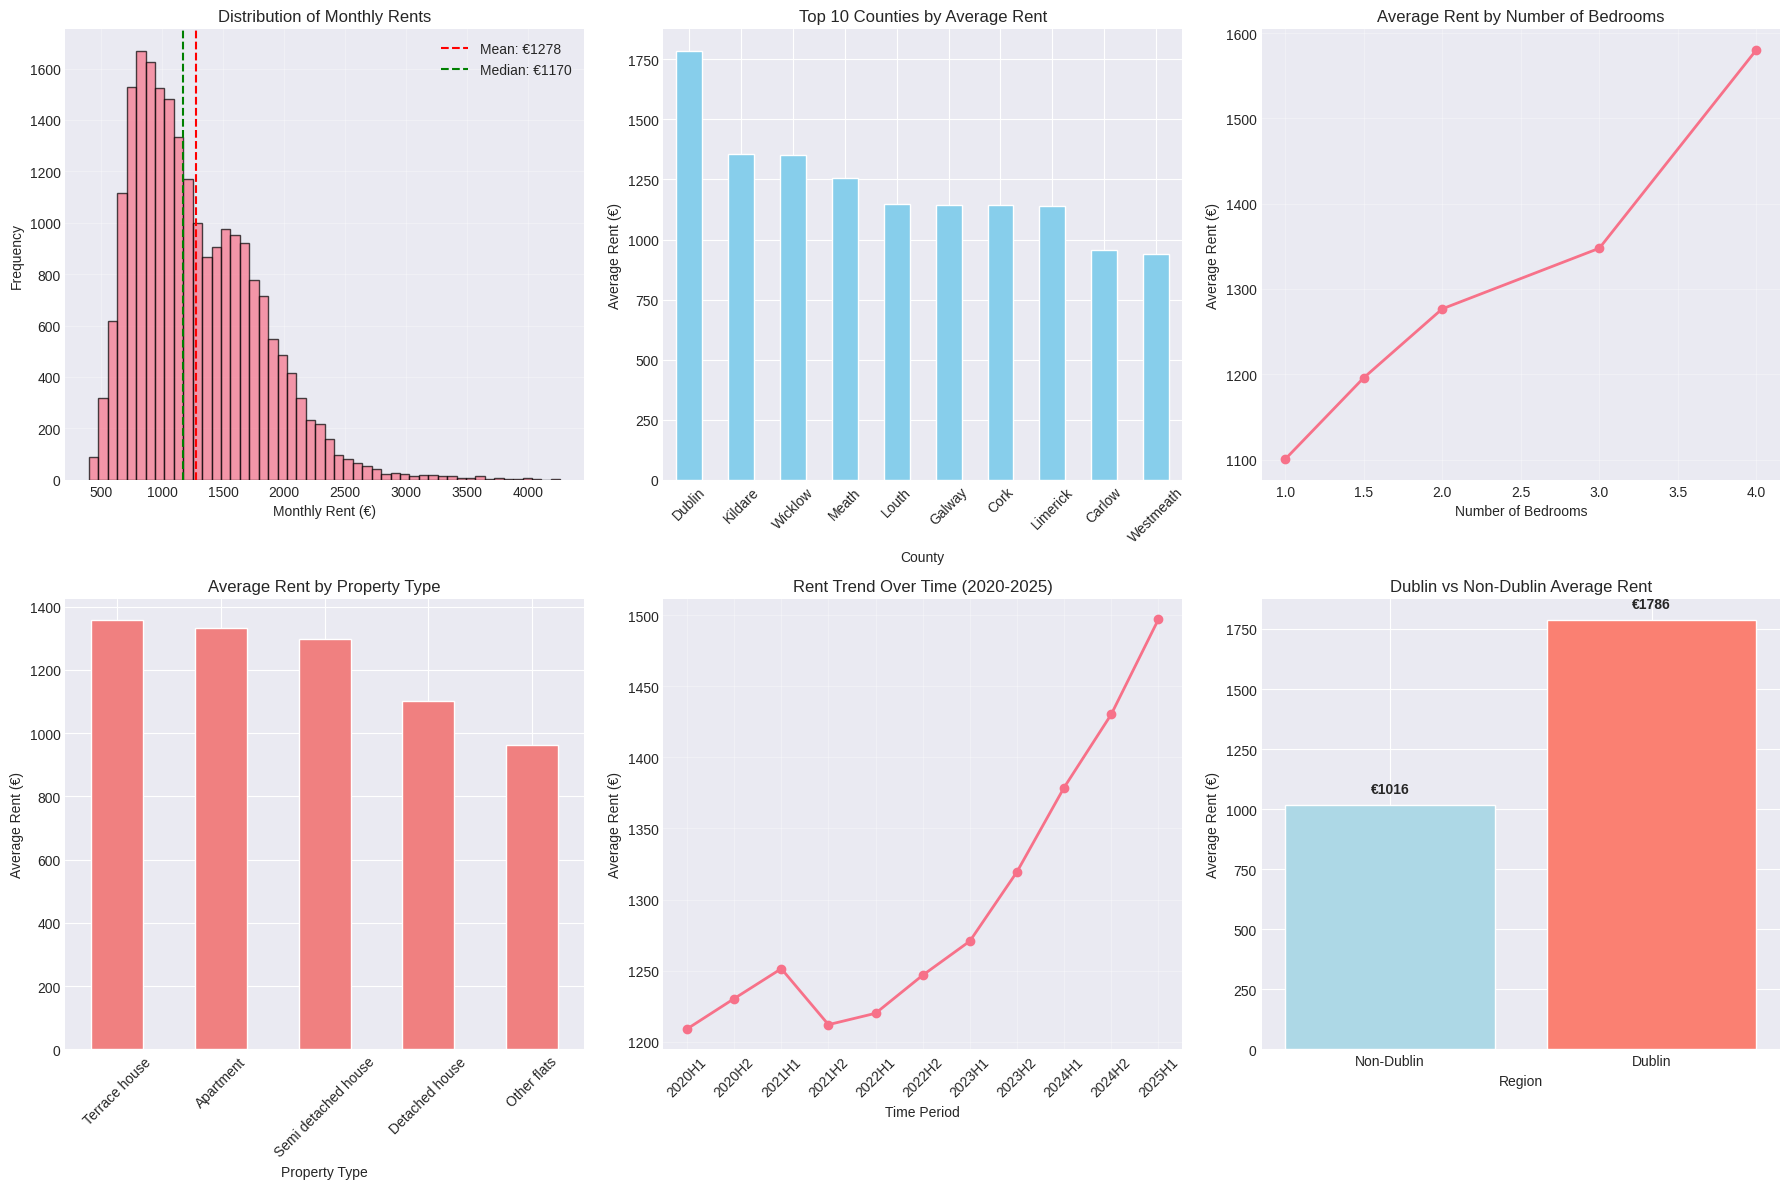


📊 Dublin Premium: Dublin rents are 75.8% higher than non-Dublin areas


In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Overall rent distribution
axes[0, 0].hist(specific_df['rent_euro'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(specific_df['rent_euro'].mean(), color='red', linestyle='--', label=f'Mean: €{specific_df["rent_euro"].mean():.0f}')
axes[0, 0].axvline(specific_df['rent_euro'].median(), color='green', linestyle='--', label=f'Median: €{specific_df["rent_euro"].median():.0f}')
axes[0, 0].set_xlabel('Monthly Rent (€)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Monthly Rents')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Rent by county (top 10)
top_counties = specific_df.groupby('county')['rent_euro'].mean().sort_values(ascending=False).head(10)
top_counties.plot(kind='bar', ax=axes[0, 1], color='skyblue')
axes[0, 1].set_xlabel('County')
axes[0, 1].set_ylabel('Average Rent (€)')
axes[0, 1].set_title('Top 10 Counties by Average Rent')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Rent by number of bedrooms
bedroom_rent = specific_df.groupby('bedrooms_num')['rent_euro'].mean().sort_index()
axes[0, 2].plot(bedroom_rent.index, bedroom_rent.values, marker='o', linewidth=2)
axes[0, 2].set_xlabel('Number of Bedrooms')
axes[0, 2].set_ylabel('Average Rent (€)')
axes[0, 2].set_title('Average Rent by Number of Bedrooms')
axes[0, 2].grid(True, alpha=0.3)

# 4. Rent by property type
prop_type_rent = specific_df.groupby('property_type')['rent_euro'].mean().sort_values(ascending=False)
prop_type_rent.plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_xlabel('Property Type')
axes[1, 0].set_ylabel('Average Rent (€)')
axes[1, 0].set_title('Average Rent by Property Type')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Rent trend over time
time_trend = specific_df.groupby(['year', 'half'])['rent_euro'].mean().reset_index()
time_trend['period'] = time_trend['year'].astype(str) + 'H' + time_trend['half'].astype(str)
axes[1, 1].plot(time_trend['period'], time_trend['rent_euro'], marker='o', linewidth=2)
axes[1, 1].set_xlabel('Time Period')
axes[1, 1].set_ylabel('Average Rent (€)')
axes[1, 1].set_title('Rent Trend Over Time (2020-2025)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

# 6. Dublin vs Non-Dublin comparison
dublin_vs_other = specific_df.groupby('is_dublin')['rent_euro'].mean()
axes[1, 2].bar(['Non-Dublin', 'Dublin'], dublin_vs_other.values, color=['lightblue', 'salmon'])
axes[1, 2].set_xlabel('Region')
axes[1, 2].set_ylabel('Average Rent (€)')
axes[1, 2].set_title('Dublin vs Non-Dublin Average Rent')
# Add value labels on bars
for i, v in enumerate(dublin_vs_other.values):
    axes[1, 2].text(i, v + 50, f'€{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate the Dublin premium
dublin_premium = (dublin_vs_other[True] - dublin_vs_other[False]) / dublin_vs_other[False] * 100
print(f"\n📊 Dublin Premium: Dublin rents are {dublin_premium:.1f}% higher than non-Dublin areas")

In [ ]:
# Advanced statistical analysis
print("="*60)
print("DETAILED STATISTICAL ANALYSIS")
print("="*60)

# 1. Correlation analysis (for numerical columns)
print("\n1. Correlation Analysis:")
numeric_cols = specific_df.select_dtypes(include=[np.number]).columns
correlation_matrix = specific_df[numeric_cols].corr()
print(correlation_matrix['rent_euro'].sort_values(ascending=False))

# 2. Rent growth analysis
print("\n2. Annual Rent Growth Analysis:")
for year in range(2020, 2025):
    current = specific_df[specific_df['year'] == year]['rent_euro'].mean()
    if year > 2020:
        previous = specific_df[specific_df['year'] == year-1]['rent_euro'].mean()
        growth = (current - previous) / previous * 100
        print(f"   {year-1} to {year}: {growth:.2f}% growth (€{previous:.0f} → €{current:.0f})")

# 3. Analysis by province
print("\n3. Analysis by Province:")
province_stats = specific_df.groupby('province').agg({
    'rent_euro': ['mean', 'median', 'std', 'count']
}).round(2)
print(province_stats)

# 4. Bedroom analysis
print("\n4. Bedroom Analysis:")
bedroom_stats = specific_df.groupby('bedrooms').agg({
    'rent_euro': ['mean', 'median', 'std', 'count']
}).round(2)
print(bedroom_stats)

DETAILED STATISTICAL ANALYSIS

1. Correlation Analysis:
rent_euro       1.000000
bedrooms_num    0.205492
year            0.142816
time_period     0.142243
half           -0.006211
Name: rent_euro, dtype: float64

2. Annual Rent Growth Analysis:
   2020 to 2021: 1.01% growth (€1220 → €1232)
   2021 to 2022: 0.14% growth (€1232 → €1234)
   2022 to 2023: 5.03% growth (€1234 → €1296)
   2023 to 2024: 8.46% growth (€1296 → €1406)

3. Analysis by Province:
         rent_euro                        
              mean   median     std  count
province                                  
Connacht    948.91   889.40  297.81   2559
Leinster   1487.45  1476.70  508.93  13636
Munster    1005.81   962.09  294.75   5153
Ulster      744.21   722.22  174.82   1136

4. Bedroom Analysis:
              rent_euro                       
                   mean   median     std count
bedrooms                                      
1 to 2 bed      1195.77  1113.32  442.02  4565
1 to 3 bed      1264.55  1158.96 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare data for ML (using specific dataset)
print("\n" + "="*60)
print("PREPARING FOR MACHINE LEARNING")
print("="*60)

# Select features and target
ml_df = specific_df.copy()

# Encode categorical variables
categorical_features = ['county', 'property_type', 'bedrooms']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    ml_df[f'{feature}_encoded'] = le.fit_transform(ml_df[feature])
    label_encoders[feature] = le
    print(f"Encoded {feature}: {len(le.classes_)} unique values")

# Define features (X) and target (y)
features = ['year', 'half', 'bedrooms_num', 'is_dublin', 'is_city', 
            'county_encoded', 'property_type_encoded', 'bedrooms_encoded']
X = ml_df[features]
y = ml_df['rent_euro']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

# Train a baseline Random Forest model
print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"  R² Score: {r2:.4f}")
print(f"  Mean Absolute Error: €{mae:.2f}")
print(f"  Relative Error: {(mae / y_test.mean() * 100):.2f}% of average rent")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance:")
for idx, row in feature_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']*100:.2f}%")


PREPARING FOR MACHINE LEARNING
Encoded county: 26 unique values
Encoded property_type: 5 unique values
Encoded bedrooms: 6 unique values

Data split:
  Training set: 17987 samples
  Test set: 4497 samples

Training Random Forest Regressor...

Model Performance:
  R² Score: 0.8558
  Mean Absolute Error: €130.35
  Relative Error: 10.14% of average rent

Feature Importance:
  is_dublin: 57.67%
  bedrooms_num: 13.27%
  county_encoded: 11.71%
  property_type_encoded: 7.17%
  year: 6.45%
  bedrooms_encoded: 1.91%
  is_city: 1.24%
  half: 0.58%



TIME SERIES ANALYSIS


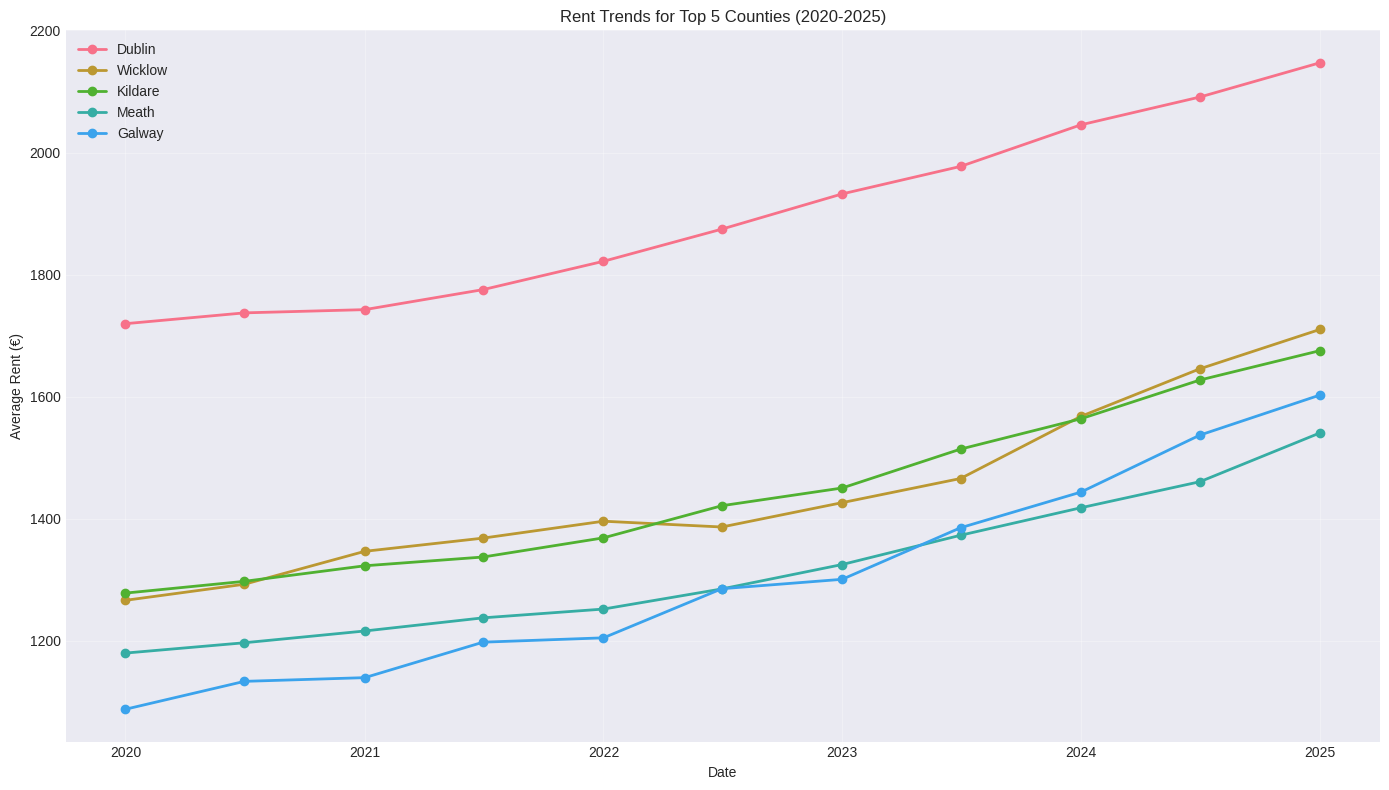


Cumulative Growth (2020-2025):
  Dublin: 24.9% (€1720 → €2147)
  Wicklow: 35.1% (€1266 → €1710)
  Kildare: 31.1% (€1278 → €1676)
  Meath: 30.6% (€1180 → €1541)
  Galway: 47.3% (€1088 → €1603)


In [ ]:
# Time series analysis
print("\n" + "="*60)
print("TIME SERIES ANALYSIS")
print("="*60)

# Create a proper time index
county_df['date'] = pd.to_datetime(county_df['year'].astype(str) + '-' + 
                                   county_df['half'].apply(lambda x: '01' if x == 1 else '07') + '-01')

# Pivot for time series analysis
time_series = county_df.pivot_table(
    index='date', 
    columns='county', 
    values='rent_euro',
    aggfunc='mean'
)

# Analyze top counties over time
top_5_counties = county_df.groupby('county')['rent_euro'].mean().sort_values(ascending=False).head(5).index.tolist()

plt.figure(figsize=(14, 8))
for county in top_5_counties:
    if county in time_series.columns:
        plt.plot(time_series.index, time_series[county], marker='o', label=county, linewidth=2)

plt.xlabel('Date')
plt.ylabel('Average Rent (€)')
plt.title('Rent Trends for Top 5 Counties (2020-2025)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate growth rates for top counties
print("\nCumulative Growth (2020-2025):")
for county in top_5_counties:
    county_data = county_df[county_df['county'] == county].sort_values('date')
    if len(county_data) > 1:
        start_rent = county_data.iloc[0]['rent_euro']
        end_rent = county_data.iloc[-1]['rent_euro']
        growth = (end_rent - start_rent) / start_rent * 100
        print(f"  {county}: {growth:.1f}% (€{start_rent:.0f} → €{end_rent:.0f})")

In [ ]:
# Save processed data and results
output_dir = '/kaggle/working/'

# 1. Save processed ML-ready data
ml_df.to_csv(f'{output_dir}/processed_ml_data.csv', index=False)
print(f"Saved processed ML data to: {output_dir}processed_ml_data.csv")

# 2. Save summary statistics
summary_stats = pd.DataFrame({
    'metric': ['Overall Mean', 'Overall Median', 'Dublin Mean', 'Non-Dublin Mean', 
               'Dublin Premium %', 'Model R2 Score', 'Model MAE (€)'],
    'value': [specific_df['rent_euro'].mean(), specific_df['rent_euro'].median(),
              dublin_vs_other[True], dublin_vs_other[False],
              dublin_premium, r2, mae]
})
summary_stats.to_csv(f'{output_dir}/summary_statistics.csv', index=False)

# 3. Save feature importance
feature_importance.to_csv(f'{output_dir}/feature_importance.csv', index=False)

print(f"\nAnalysis complete! Files saved to {output_dir}")
print("\n📁 Generated files:")
print("  1. processed_ml_data.csv - ML-ready dataset with encoded features")
print("  2. summary_statistics.csv - Key metrics from analysis")
print("  3. feature_importance.csv - ML model feature rankings")

Saved processed ML data to: /kaggle/working/processed_ml_data.csv

Analysis complete! Files saved to /kaggle/working/

📁 Generated files:
  1. processed_ml_data.csv - ML-ready dataset with encoded features
  2. summary_statistics.csv - Key metrics from analysis
  3. feature_importance.csv - ML model feature rankings
